# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [178]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.dummy import DummyRegressor
from sklearn import linear_model

In [110]:
df_train=pd.read_csv('/datasets/gold_industry_train.csv')
df_test=pd.read_csv('/datasets/gold_industry_test.csv')
df=pd.read_csv('/datasets/gold_industry_full.csv')

In [111]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [112]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [113]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


Во всех датафреймах есть пропуски, предобработку проведем позже. Сейчас проверим расчет recovery.

In [114]:
df_train['recovery_check']=(df_train['rougher.output.concentrate_au']*\
    (df_train['rougher.input.feed_au']-df_train['rougher.output.tail_au']))/\
    (df_train['rougher.input.feed_au']*\
    (df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']))*100
df_check=df_train[['rougher.output.recovery','recovery_check']]
df_check.dropna(inplace=True)
df_check['recovery_check']=round(df_check['recovery_check'])
df_check['rougher.output.recovery']=round(df_check['rougher.output.recovery'])
mean_absolute_error(df_check['recovery_check'], df_check['rougher.output.recovery'])

/tmp/ipykernel_32/979121548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.dropna(inplace=True)
/tmp/ipykernel_32/979121548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['recovery_check']=round(df_check['recovery_check'])
/tmp/ipykernel_32/979121548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

0.0

МАЕ 0, вычисления правильные. *Первоначальное МАЕ было больше нуля, проверил датафрейм и заметил, что иногда расчеты отличались после 5-7 знака после запятой. Не думаю, что потеря молекулярной доли золота в расчетах важна в задании, так что предположим, что расчеты правильные.*

In [115]:
for i in df.columns:
    if i not in df_test.columns:
        print (i)

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
final.output.concentrate_au
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_au
final.output.ta

В тестовой выборке нет некоторых расчетных характеристик и выдачи ценных металлов на каждом этапе. На самом деле, эти данные нам не нужны для предсказания - они нужны для расчета recovery, которую мы будем предсказывать на основе тех. процесса (также, я не уверен, что модель, обученная с учетом этих признаков будет работать с датафреймом без них). Перейдем к предобработке.

Во всех датафреймах есть пропуски, возможности восстановить эти данные нет. Модель с пропусками работать не сможет, поэтому оставлять их тоже нельзя. Заглушки снизят точность предсказаний. Придется удалить строки с пропусками в нужных нам значениях, в столбцы, которых нет в тестовой выборке (т.е. не будут использоваться в модели) поставим заглушки в виде 0, т.к. их еще можно использовать.

In [116]:
df2=df
for i in df2.columns:
    if i in df_test.columns:
        df2.dropna(subset=[i],inplace=True)
df2=df2.fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17908 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                17908 non-null  object 
 1   rougher.input.feed_au                               17908 non-null  float64
 2   rougher.input.feed_ag                               17908 non-null  float64
 3   rougher.input.feed_pb                               17908 non-null  float64
 4   rougher.input.feed_sol                              17908 non-null  float64
 5   rougher.input.feed_rate                             17908 non-null  float64
 6   rougher.input.feed_size                             17908 non-null  float64
 7   rougher.input.floatbank10_sulfate                   17908 non-null  float64
 8   rougher.input.floatbank10_xanthate                  17908 non-null  float64


In [117]:
df_train2=df_train
for i in df_train2.columns:
    if i in df_test.columns:
        df_train2.dropna(subset=[i],inplace=True)
df_train2=df_train2.fillna(0)
df_train2.shape

(13371, 88)

In [118]:
df_test2=df_test
df_test2.dropna(inplace=True)
df_test2.shape

(4537, 53)

In [119]:
print(df2.duplicated().value_counts())
print(df_train2.duplicated().value_counts())
print(df_test2.duplicated().value_counts())

False    17908
dtype: int64
False    13371
dtype: int64
False    4537
dtype: int64


Дубликатов нет, из-за пропусков пришлось удалить 8% данных. Также были поставлены заглушки в виде 0. Данные готовы к работе. 

## Анализ данных

Среднее кол-во сырья Au: 8.314461503312353
Медиана кол-ва сырья Au: 8.149709584949559
Среднее кол-во чернового концентрата Au: 19.918702061048403
Медиана кол-ва чернового концентрата Au: 20.34980800814676
Среднее кол-во очищенного концентрата Au: 32.15275920212488
Медиана кол-ва очищенного концентрата Au: 32.76099130917136
Среднее кол-во финального концентрата Au: 44.192261594083604
Медиана кол-ва финального концентрата Au: 45.01309090546902


<AxesSubplot:>

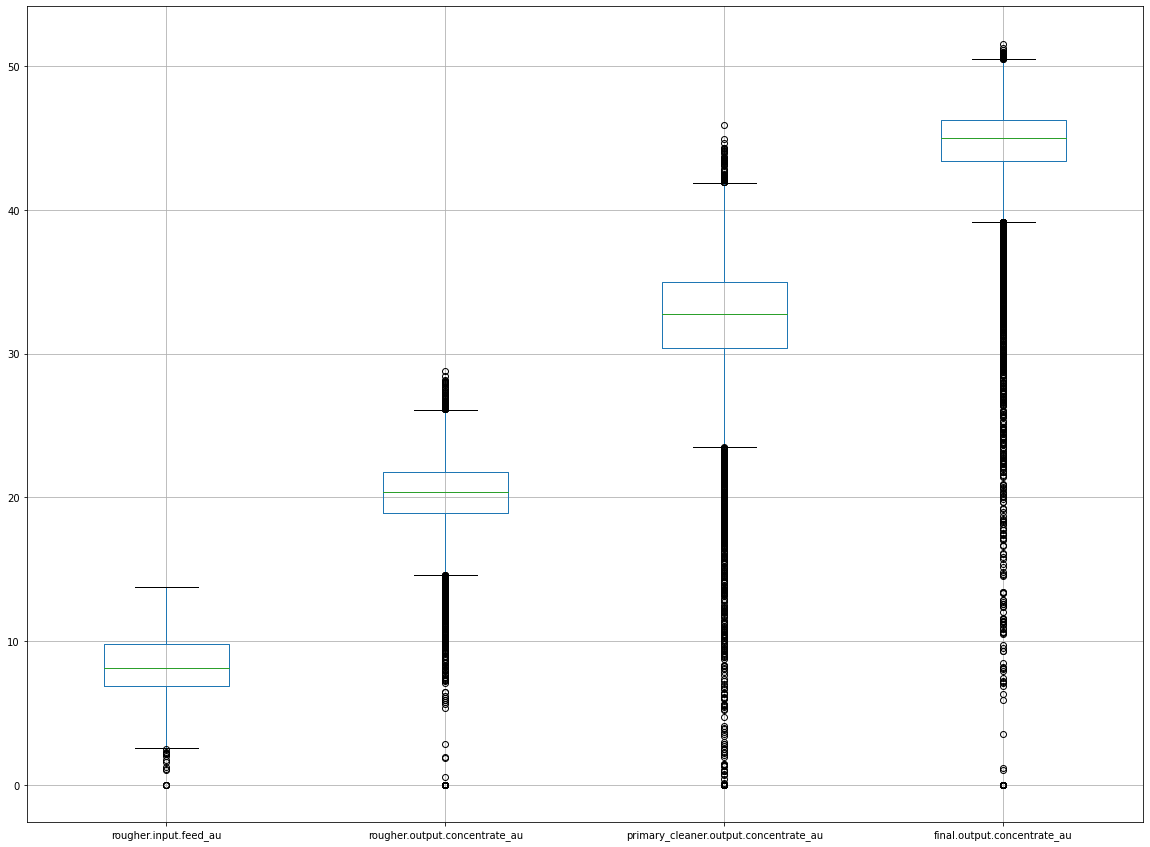

In [120]:
print('Среднее кол-во сырья Au:',df2['rougher.input.feed_au'].mean())
print('Медиана кол-ва сырья Au:',df2['rougher.input.feed_au'].median())
print('Среднее кол-во чернового концентрата Au:',df2['rougher.output.concentrate_au'].mean())
print('Медиана кол-ва чернового концентрата Au:',df2['rougher.output.concentrate_au'].median())
print('Среднее кол-во очищенного концентрата Au:',df2['primary_cleaner.output.concentrate_au'].mean())
print('Медиана кол-ва очищенного концентрата Au:',df2['primary_cleaner.output.concentrate_au'].median())
print('Среднее кол-во финального концентрата Au:',df2['final.output.concentrate_au'].mean())
print('Медиана кол-ва финального концентрата Au:',df2['final.output.concentrate_au'].median())
df2.boxplot(column=['rougher.input.feed_au','rougher.output.concentrate_au',
            'primary_cleaner.output.concentrate_au','final.output.concentrate_au'],figsize=(20,15))

Доля золота увеличивается с каждым шагом, однако очень много выбросов, особенно в последних 2 этапах обработки. С учетом того, что на первом этапе выборосов намного меньше, стоит предположить что тех. процесс сильно влияет на качество.

Среднее кол-во сырья Ag: 8.815912904118447
Медиана кол-ва сырья Ag: 8.59771016066701
Среднее кол-во чернового концентрата Ag: 12.02001234434156
Медиана кол-ва чернового концентрата Ag: 12.077092318414582
Среднее кол-во очищенного концентрата Ag: 8.501495050239189
Медиана кол-ва очищенного концентрата Ag: 8.534430757483438
Среднее кол-во финального концентрата Ag: 5.152700043071946
Медиана кол-ва финального концентрата Ag: 5.031100117813823


<AxesSubplot:>

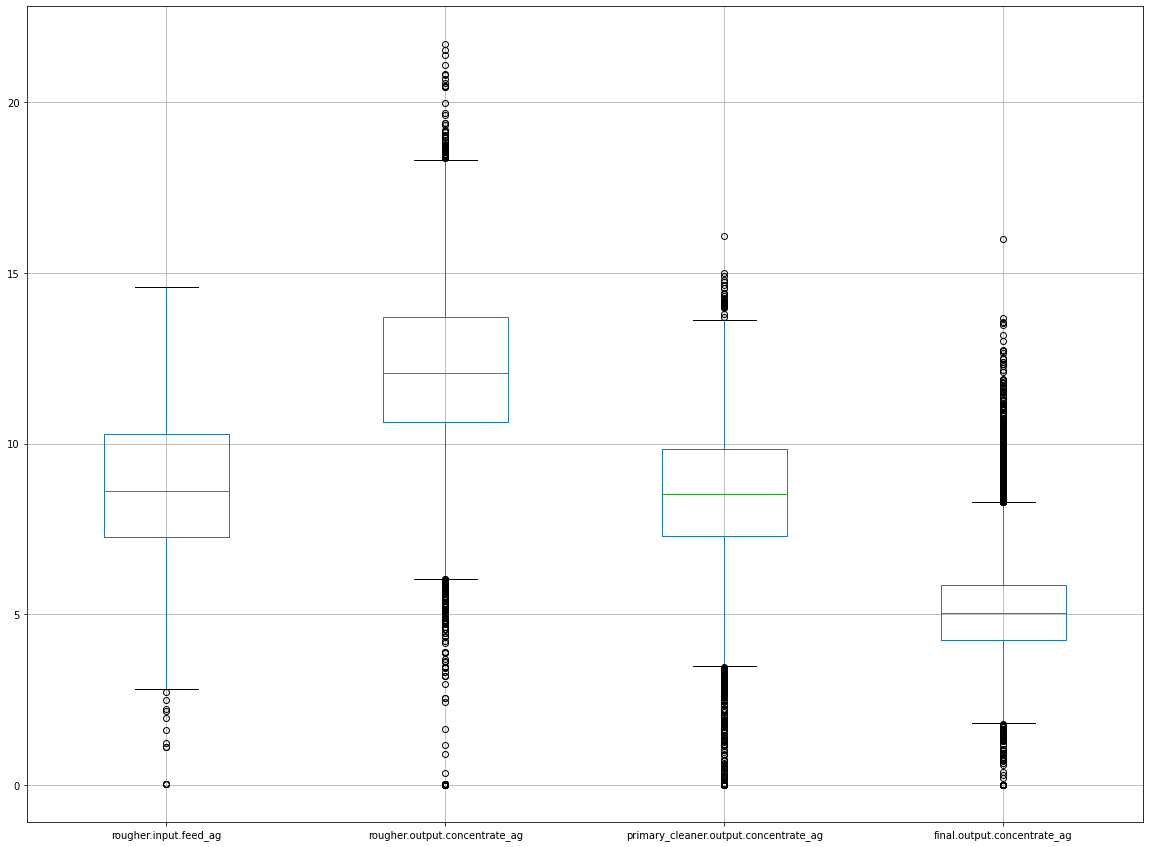

In [121]:
print('Среднее кол-во сырья Ag:',df2['rougher.input.feed_ag'].mean())
print('Медиана кол-ва сырья Ag:',df2['rougher.input.feed_ag'].median())
print('Среднее кол-во чернового концентрата Ag:',df2['rougher.output.concentrate_ag'].mean())
print('Медиана кол-ва чернового концентрата Ag:',df2['rougher.output.concentrate_ag'].median())
print('Среднее кол-во очищенного концентрата Ag:',df2['primary_cleaner.output.concentrate_ag'].mean())
print('Медиана кол-ва очищенного концентрата Ag:',df2['primary_cleaner.output.concentrate_ag'].median())
print('Среднее кол-во финального концентрата Ag:',df2['final.output.concentrate_ag'].mean())
print('Медиана кол-ва финального концентрата Ag:',df2['final.output.concentrate_ag'].median())
df2.boxplot(column=['rougher.input.feed_ag','rougher.output.concentrate_ag',
            'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],figsize=(20,15))

Концентрат серебра растет после первой обработки и падает в последующих. Выбросов также много как и у золота, возможна зависимость между ними.

Среднее кол-во сырья Pb: 3.6062017142759517
Медиана кол-ва сырья Pb: 3.553564490510358
Среднее кол-во чернового концентрата Pb: 7.65044986550459
Медиана кол-ва чернового концентрата Pb: 7.746292283005186
Среднее кол-во очищенного концентрата Pb: 9.829814420207603
Медиана кол-ва очищенного концентрата Pb: 10.164272129800583
Среднее кол-во финального концентрата Pb: 10.018255578788324
Медиана кол-ва финального концентрата Pb: 10.136793613831202


<AxesSubplot:>

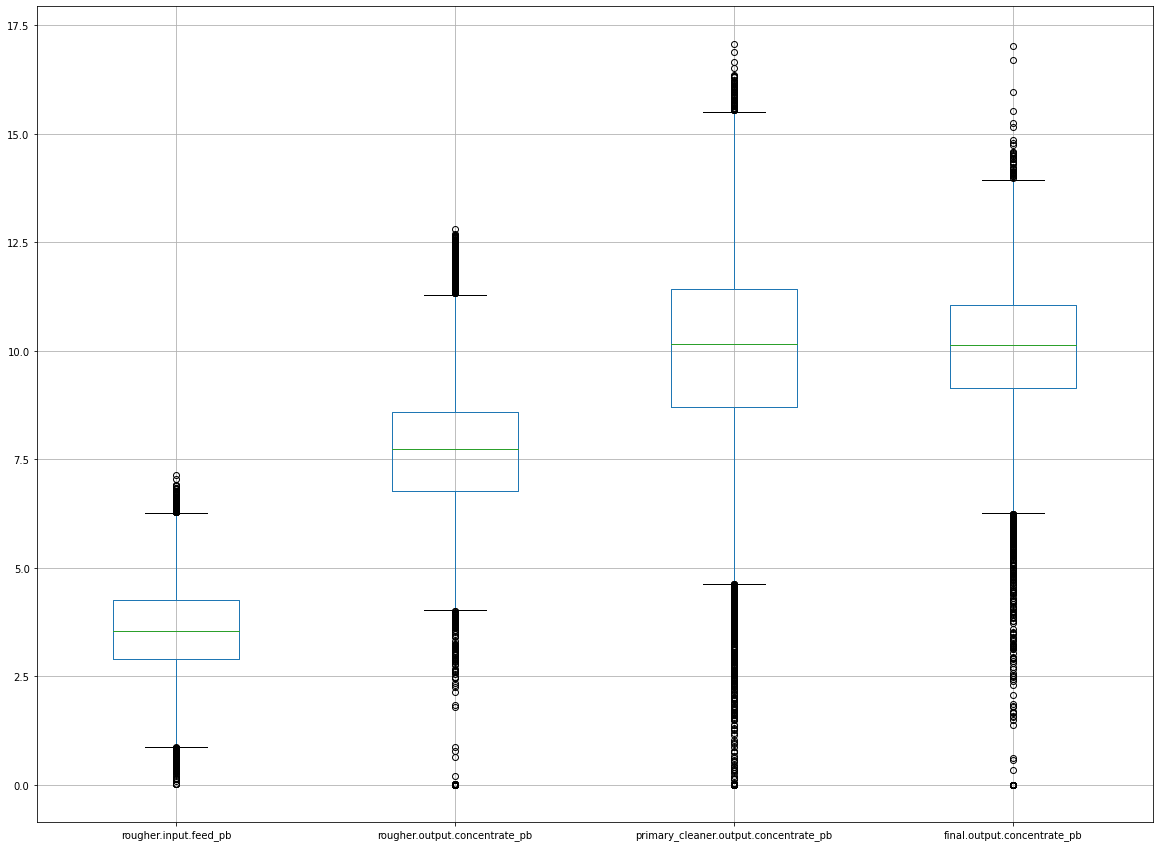

In [122]:
print('Среднее кол-во сырья Pb:',df2['rougher.input.feed_pb'].mean())
print('Медиана кол-ва сырья Pb:',df2['rougher.input.feed_pb'].median())
print('Среднее кол-во чернового концентрата Pb:',df2['rougher.output.concentrate_pb'].mean())
print('Медиана кол-ва чернового концентрата Pb:',df2['rougher.output.concentrate_pb'].median())
print('Среднее кол-во очищенного концентрата Pb:',df2['primary_cleaner.output.concentrate_pb'].mean())
print('Медиана кол-ва очищенного концентрата Pb:',df2['primary_cleaner.output.concentrate_pb'].median())
print('Среднее кол-во финального концентрата Pb:',df2['final.output.concentrate_pb'].mean())
print('Медиана кол-ва финального концентрата Pb:',df2['final.output.concentrate_pb'].median())
df2.boxplot(column=['rougher.input.feed_pb','rougher.output.concentrate_pb',
            'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'],figsize=(20,15))

Концентрация свинца растет до финальной обработки. Выбросов также много, как и у других металлов.

Возможно между выбросами есть корреляция, например если в руде намного больше одного из металлов, то будет меньше других, что даст им выброс. Также отличия в тех. процессе очевидно по разному влияет на эти металлы.

(0.0, 150.0)

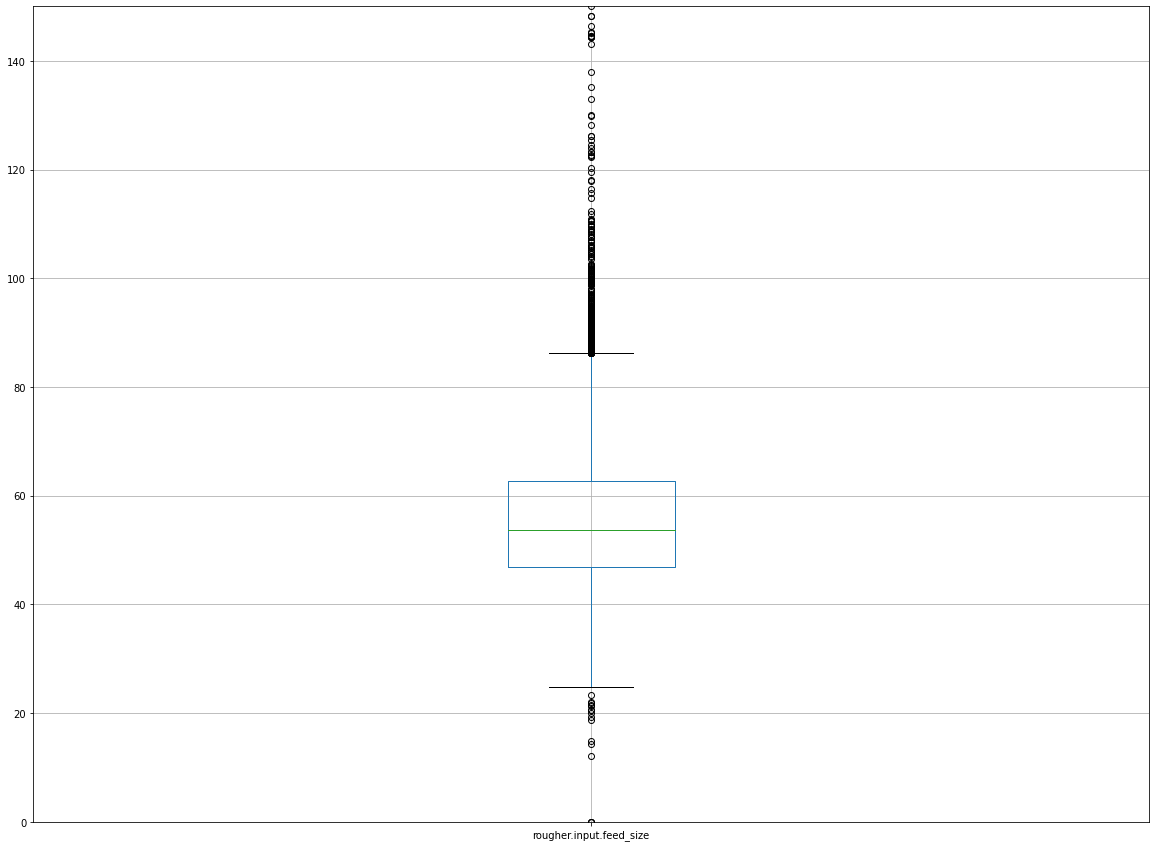

In [123]:
df_train2.boxplot(column=['rougher.input.feed_size'],figsize=(20,15))
plt.ylim(0,150)

(0.0, 150.0)

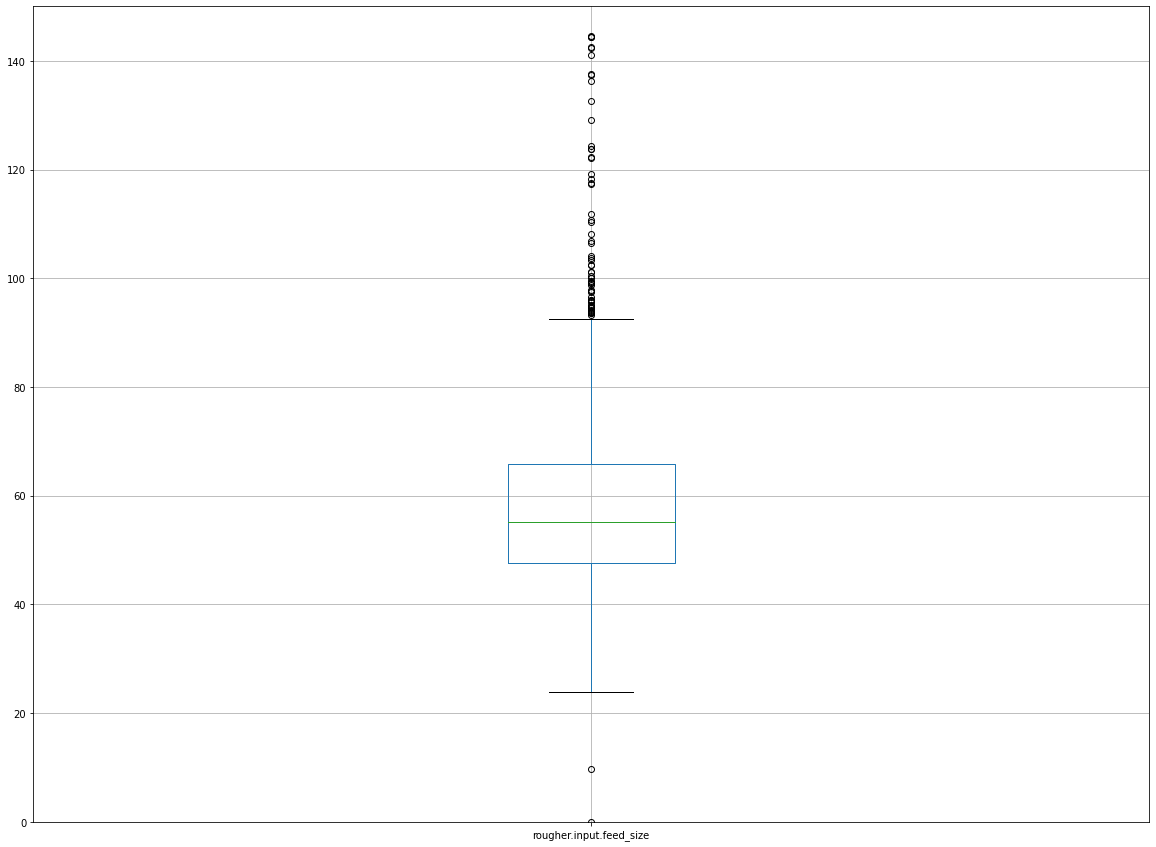

In [124]:
df_test2.boxplot(column=['rougher.input.feed_size'],figsize=(20,15))
plt.ylim(0,150)

Распределение похоже в обоих датафреймах, оценка будет правильной.

0        58.137072
1        58.699942
2        58.927421
3        58.714815
4        59.065251
           ...    
19434    58.775321
19435    59.719404
19436    59.503013
19437    59.173650
19438    58.902686
Name: final.output.total_concentrate, Length: 17908, dtype: float64

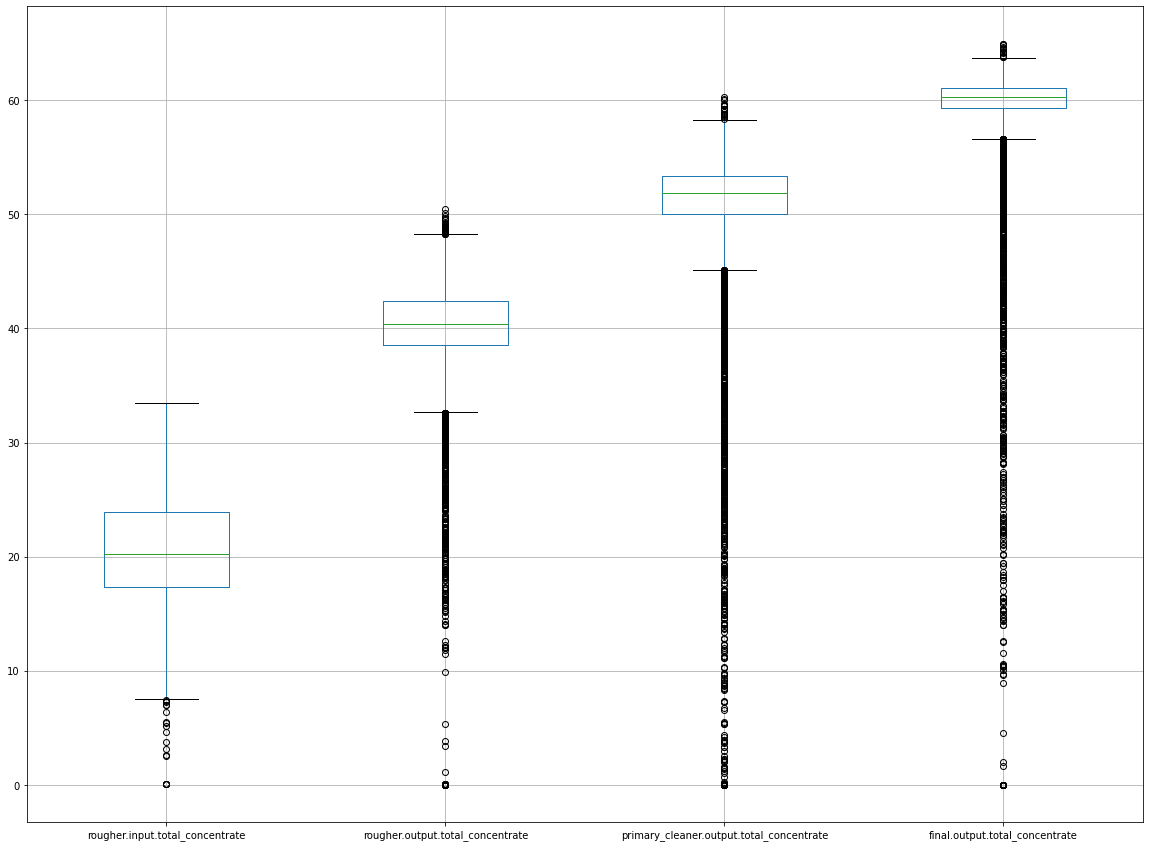

In [125]:
df2['rougher.input.total_concentrate']=df2['rougher.input.feed_pb']+df2['rougher.input.feed_au']+df2['rougher.input.feed_ag']
df2['rougher.output.total_concentrate']=df2['rougher.output.concentrate_pb']+df2['rougher.output.concentrate_au']\
    +df2['rougher.output.concentrate_ag']
df2['primary_cleaner.output.total_concentrate']=df2['primary_cleaner.output.concentrate_pb']\
    +df2['primary_cleaner.output.concentrate_au']+df2['primary_cleaner.output.concentrate_ag']
df2['final.output.total_concentrate']=df2['final.output.concentrate_pb']\
    +df2['final.output.concentrate_au']+df2['final.output.concentrate_ag']
df2.boxplot(column=['rougher.input.total_concentrate','rougher.output.total_concentrate',
            'primary_cleaner.output.total_concentrate','final.output.total_concentrate'],figsize=(20,15))
df2['final.output.total_concentrate']

Суммарная концентрация металлов стабильно растет с каждым шагом процесса и обычно составляет около 60% на финальной стадии. Однако в распределении очень много выбросов, хотя их почти нет в исходном сырье. Это еще раз подтверждает, что процесс очень сильно влияет на результат.

In [126]:
list0=df2[(df2['rougher.input.total_concentrate']==0)|(df2['rougher.output.total_concentrate']==0)
                |(df2['primary_cleaner.output.total_concentrate']==0)
                |(df2['final.output.total_concentrate']==0)]['date'].tolist()

In [127]:
df_train2.reset_index(drop=True,inplace=True)
df_test2.reset_index(drop=True,inplace=True)

In [128]:
for i in range(len(df_train2)):
    if df_train2['date'][i] in list0:
        df_train2.drop(i, inplace=True)
for i in range(len(df_test2)):
    if df_test2['date'][i] in list0:
        df_test2.drop(i, inplace=True)

## Модель

In [129]:
def sMAPE(predicted_values, real_values):
    numerator = np.abs(real_values - predicted_values)
    denominator = (np.abs(real_values) + np.abs(predicted_values)) / 2 

    return 1 / len(real_values) * np.sum(numerator / denominator) * 100 

In [130]:
def final_sMAPE(predicted_values1, real_values1, predicted_values2, real_values2):
    sMAPE1= sMAPE(predicted_values1, real_values1)
    sMAPE2= sMAPE(predicted_values2, real_values2)
    return sMAPE1*0.25+sMAPE2*0.75

Функции для определения метрик качества готовы, осталось выделить для модели features и target. В features возьмем все параметры, которые есть в тестовой выборке (кроме даты). Target - recovery после флотации и финальное. Чтобы можно было проверить качество модели, добавим их в тестовый датафрейм. В features для флотации логично включить только столбцы с параметром rougher. 

In [131]:
df2.duplicated(subset='date').value_counts()#ни одна дата не совпадает, используем их для поиска значений recovery

False    17908
dtype: int64

In [132]:
merge_df=df2[['date','rougher.output.recovery','final.output.recovery']]
df_test2=df_test2.merge(merge_df,how='left')
df_test2.drop(['date'], axis=1, inplace=True)

In [133]:
for i in df_train2.columns:
    if i not in df_test2.columns:
        df_train2.drop([i], axis=1, inplace=True)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12923 entries, 0 to 13370
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       12923 non-null  float64
 1   rougher.input.feed_ag                       12923 non-null  float64
 2   rougher.input.feed_pb                       12923 non-null  float64
 3   rougher.input.feed_sol                      12923 non-null  float64
 4   rougher.input.feed_rate                     12923 non-null  float64
 5   rougher.input.feed_size                     12923 non-null  float64
 6   rougher.input.floatbank10_sulfate           12923 non-null  float64
 7   rougher.input.floatbank10_xanthate          12923 non-null  float64
 8   rougher.state.floatbank10_a_air             12923 non-null  float64
 9   rougher.state.floatbank10_a_level           12923 non-null  float64
 10  rougher.st

In [134]:
df_train_rougher=df_train2.drop(columns=df_train2.columns[-31:], axis=1)
df_test_rougher=df_test2.drop(columns=df_test2.columns[-32:], axis=1)
df_test_rougher['rougher.output.recovery']=df_test2['rougher.output.recovery']
print(df_test_rougher.info())
df_train_rougher.info()#датафреймы для первого таргета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4537 entries, 0 to 4536
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_au               4537 non-null   float64
 1   rougher.input.feed_ag               4537 non-null   float64
 2   rougher.input.feed_pb               4537 non-null   float64
 3   rougher.input.feed_sol              4537 non-null   float64
 4   rougher.input.feed_rate             4537 non-null   float64
 5   rougher.input.feed_size             4537 non-null   float64
 6   rougher.input.floatbank10_sulfate   4537 non-null   float64
 7   rougher.input.floatbank10_xanthate  4537 non-null   float64
 8   rougher.state.floatbank10_a_air     4537 non-null   float64
 9   rougher.state.floatbank10_a_level   4537 non-null   float64
 10  rougher.state.floatbank10_b_air     4537 non-null   float64
 11  rougher.state.floatbank10_b_level   4537 no

In [135]:
features_train_rougher = df_train_rougher.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = df_train_rougher['rougher.output.recovery']
features_test_rougher = df_test_rougher.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = df_test_rougher['rougher.output.recovery']

features_train_final = df_train2.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_final = df_train2['rougher.output.recovery']
features_test_final = df_test2.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_final = df_test2['final.output.recovery']

print(features_train_rougher.shape)
print(target_train_rougher.shape)
print(features_test_rougher.shape)
print(target_test_rougher.shape)
print()
print(features_train_final.shape)
print(target_train_final.shape)
print(features_test_final.shape)
print(target_test_final.shape)

(12923, 22)
(12923,)
(4537, 22)
(4537,)

(12923, 52)
(12923,)
(4537, 52)
(4537,)


Сначала обучим модель для флотации.

In [165]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)
best_model = None
best_score = -10
for est in range(1, 20):
    for depth in range(1,10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train_rougher,target_train_rougher)
        score=cross_val_score(model, features_train_rougher, target_train_rougher, scoring=smape_scorer, cv=5).mean()
        if score > best_score:
            best_model = model
            best_score = score
        print("Модель:", model)
        print("Score:", score)
print("Лучшая модель:", best_model)
print("Score лучшей модели:", best_score)
        

Модель: RandomForestRegressor(max_depth=1, n_estimators=1, random_state=12345)
Score: -6.838100209715011
Модель: RandomForestRegressor(max_depth=2, n_estimators=1, random_state=12345)
Score: -6.0397128562398565
Модель: RandomForestRegressor(max_depth=3, n_estimators=1, random_state=12345)
Score: -6.23513720696077
Модель: RandomForestRegressor(max_depth=4, n_estimators=1, random_state=12345)
Score: -6.088704689038434
Модель: RandomForestRegressor(max_depth=5, n_estimators=1, random_state=12345)
Score: -5.996458042871929
Модель: RandomForestRegressor(max_depth=6, n_estimators=1, random_state=12345)
Score: -6.237185918179108
Модель: RandomForestRegressor(max_depth=7, n_estimators=1, random_state=12345)
Score: -6.30833551219782
Модель: RandomForestRegressor(max_depth=8, n_estimators=1, random_state=12345)
Score: -6.618655628536489
Модель: RandomForestRegressor(max_depth=9, n_estimators=1, random_state=12345)
Score: -7.225282121857042
Модель: RandomForestRegressor(max_depth=1, n_estimators=

In [139]:
model = LinearRegression()
model.fit(features_train_rougher, target_train_rougher)
score=cross_val_score(model, features_train_rougher, target_train_rougher, scoring=smape_scorer, cv=5).mean()
score

-6.15299196677391

In [187]:
model = RandomForestRegressor(random_state=12345)
model.fit(features_train_final,target_train_final)
parameters = {'n_estimators' : sp_randInt(1, 15), 'max_depth' : sp_randInt(1, 10)
              , 'max_features' : sp_randInt(1, 5), 'min_samples_leaf' : sp_randInt(1, 5)}
randm_src = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5, scoring=smape_scorer, random_state=12345)
randm_src.fit(features_train_final, target_train_final)
randm_src.best_params_

{'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 9}

In [203]:
model = RandomForestRegressor(random_state=12345, criterion='mae', n_estimators=9, max_depth=8, max_features= 4, min_samples_leaf=2)
model.fit(features_train_final,target_train_final)
score=cross_val_score(model, features_train_final, target_train_final, scoring=smape_scorer, cv=5).mean()
score

-6.047549558564052

In [183]:
model=linear_model.Lasso(alpha=0.1)
model.fit(features_train_final,target_train_final)
score=cross_val_score(model, features_train_final, target_train_final, scoring=smape_scorer, cv=5).mean()
score

-6.4828385538664035

In [161]:
model = LinearRegression()
model.fit(features_train_final, target_train_final)
score=cross_val_score(model, features_train_final, target_train_final, scoring=smape_scorer, cv=5).mean()
score

-6.742082217121367

In [162]:
dummy=DummyRegressor(strategy="mean")
dummy.fit(features_train_final, target_train_final)
score=cross_val_score(dummy, features_train_final, target_train_final, scoring=smape_scorer, cv=5).mean()
score

-7.133311015140395

In [163]:
dummy=DummyRegressor(strategy="median")
dummy.fit(features_train_final, target_train_final)
score=cross_val_score(dummy, features_train_final, target_train_final, scoring=smape_scorer, cv=5).mean()
score

-6.9276347904563025

In [164]:
dummy=DummyRegressor(strategy="median")
dummy.fit(features_train_rougher, target_train_rougher)
score=cross_val_score(dummy, features_train_rougher, target_train_rougher, scoring=smape_scorer, cv=5).mean()
score

-6.9276347904563025

Почти все полученные модели как минимум лучше константных по sMAPE, лучшие показатели у RandomForestRegressor со следующими настройками:
- для rougher: max_depth=5, n_estimators=4
- для final: max_depth=5, n_estimators=11

In [206]:
model = RandomForestRegressor(random_state=12345, n_estimators=4, max_depth=5)
model.fit(features_train_rougher, target_train_rougher)
predictions_rougher=model.predict(features_test_rougher)
print(sMAPE(predictions_rougher,target_test_rougher))
model = RandomForestRegressor(random_state=12345, criterion='mae', n_estimators=9, max_depth=8, max_features= 4, min_samples_leaf=2)
model.fit(features_train_final, target_train_final)
predictions_final=model.predict(features_test_final)
print(sMAPE(predictions_final,target_test_final))
sMAPE_final=final_sMAPE(predictions_rougher, target_test_rougher, predictions_final, target_test_final)
sMAPE_final

3.856859713116293
23.835171226271985


18.840593347983063

In [207]:
model = DummyRegressor(strategy="median")
model.fit(features_train_rougher, target_train_rougher)
predictions_rougher=model.predict(features_test_rougher)
print(sMAPE(predictions_rougher,target_test_rougher))
model = DummyRegressor(strategy="median")
model.fit(features_train_final, target_train_final)
predictions_final=model.predict(features_test_final)
print(sMAPE(predictions_final,target_test_final))

5.83321841779251
24.33896026764699


Финальный sMAPE на тестовой выборке 18,5%, причем за счет высокого sMAPE предсказаний финального концентрата. Очень большая разница по сравнению с результатами обучающей выборки, хотя все равно лучше константы. Выглядит так, будто модель переобучилась, попробовал увеличить метрики через большее кол-во гиперпараметров, но sMAPE все равно не выходит ниже 23.5%.

## Общий вывод

В ходе исследования были сделаны следующие шаги:
1. Данные загружены.
2. Удалены 8% в связи с пропусками, поставлены заглушки в строках, не нужных для обучения модели.
3. На основе данных построены несколько разных моделей, выбраны модели с лучшими результатами.
4. Выбранные модели проверены кросс-валидацией и сравнением с константой.
5. Выбранные модели проверены на тестовой выборке, достигнута финальная метрика sMAPE в 18.8%.

Итого был построен прототип модели, симметричное среднее абсолютное процентное отклонение которой составляет 3,8% при предсказании эффективности обогащения чернового концентрата и 23,8% при предсказании эффективности обогащения финального концентрата, что дает нам финальное sMAPE в 18,8%.  